## 5.1 ref는 어떤 상황에서 사용해야 할까?
- ref란?
    - HTML에서 id를 사용하여 DOM에 이름을 다는 것처럼 리액트 프로젝트 내부에서 DOM에 이름을 다는 방법
    - DOM을 꼭 직접적으로 건드려야 할때 사용 

- 예제 컴포넌트
    - input에서 onChange 이벤트가 발생하면 handleChange를 호출하여 state의 password 값을 업데이트
    - button에서는 onClick 이벤트가 발생하면 handleButtonClick을 호출하여 clicked 값을 참으로 설정, validated값을 검증 결과로 설정
    - input의 검증결과에 따라 success or failure 설정하고 값에 따라 색상이 초록 or 빨강으로 나타남
```js
import  { Component } from 'react';
import './ValidationSample.css';

class ValidationSample extends Component {
    state = {
        password: '',
        clicked: false,
        validated: false
    };

    handleChange = (e) => {
        this.setState({
        password: e.target.value
        });
    };

    handleButtonClick = () => {
        this.setState({
            clicked: true,
            validated: this.state.password === '0000'
        });
    };

    render() {
        return (
            <div>
                <input
                    type="password"
                    value={this.state.password}
                    onChange={this.handleChange}
                    className={this.state.clicked ? (this.state.validated ? 'success' : 'failure') : ''}
                />
                <button onClick={this.handleButtonClick}>검증하기</button>
            </div>
        );
    }
}

export default ValidationSample;
```
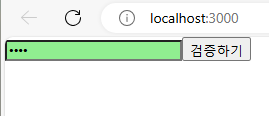

- state만으로 해결할 수 없는 기능이 존재
    - 특정 input에 포커스 주기
    - 스크롤 박스 조작하기
    - Canvas 요소에 그림 그리기 등

- 위 같은 상항에서 DOM에 직접적으로 접근해야 하는데, 이때 ref를 사용

## 5.2 ref 사용
### 콜백 함수를 통한 ref 설정
- 콜백함수 사용
- ref를 달고자 하는 요소에 ref라는 콜백 함수를 props로 전달
- 콜백함수는 ref 값을 파라미터로 전달받음, 함수 내부에서 ref를 컴포넌트의 맴버 변수로 설정
```js
<input ref={(ref) => {this.input=ref}}/>
```
- this.input은 input 요소의 DOM을 가리킨다

### createRef를 통한 ref 설정
- 리액트에 내장되어 있는 createRef 함수 사용(v16.3 부터 도입)
- createRef를 사용하여 ref를 만드려면 컴포넌트 내부에서 맴버 변수로 React.createRef()를 담아주어야한다.
- ref를 달고자 하는 요소에 ref props로 넣어주면 설정됨
- ref를 설정한 DOM에 접근하려면 this.input.current를 조회하면 된다
```js
import { Component } from 'react';

class RefSample extends Component {
    input = React.createRef();
    
    handleFocus = () => {
        this.input.current.focus();
    }

    render() {
        return (
            <div>
                <input ref={this.input} />
            </div>
        );
    }
}

export default RefSample;
```

## 5.3 컴포넌트에 ref 달기
- 주로 컴포넌트 내부에 있는 DOM을 컴포넌트 외부에서 사용할때 사용
- 사용법
```js
<MyComponent
    ref={(ref) => {this.myComponent=ref}}
/>
```

```js
import { Component } from 'react';

class ScrollBox extends Component {
    scrollToBottom = () => {
        const { scrollHeight, clientHeight } = this.box;
        this.box.scrollTop = scrollHeight - clientHeight;
    };

    render() {
        const style = {
            border: '1px solid black',
            height: '300px',
            width: '300px',
            overflow: 'auto',
            position: 'relative'
        };

        const innerStyle = {
            width: '100%',
            height: '650px',
            background: 'linear-gradient(white, black)'
        };

        return (
            <div
                style={style}
                ref={(ref) => {this.box = ref}}
            >
                <div style={innerStyle} />
            </div>
        );
    }
}
export default ScrollBox;
```

```js
import { Component } from 'react';
import ScrollBox from './ScrollBox';

class App extends Component {
    render() {
        return (
            <div>
                <ScrollBox ref={(ref) => (this.scrollBox = ref)} />
                <button onClick={() => this.scrollBox.scrollToBottom()}>
                    맨 밑으로
                </button>
            </div>
        );
    }
}

export default App;
```
- 문법상 onClick = {this.scrollBox.scrollToBottom} 틀린 코드는 아니다.
- 하지만 컴포넌트가 처음 렌더링 될 때 this.scrollBox 값이 undefined이므로 오류가 발생한다.
- 화살표 함수 문법을 사용하여 새로운 함수를 만드면 버튼을 누를 때 값을 읽어와 실행하므로 오류가 발생하지 않는다.

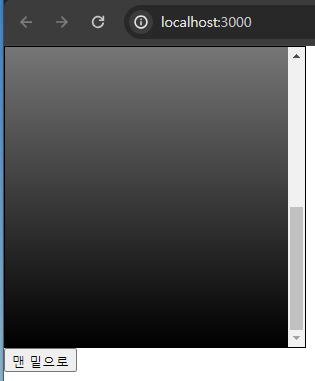

## 5.4 정리
- 컴포넌트 내부에서 DOM에 직접 접근해야 할 때 ref 사용
    - 먼저 ref를 사용하지 않고 기능 구현 가능한지 고려한 후 활용!!
- 서로 다른 컴포넌트끼리 데이터를 교류할 때 ref 사용하면 잘못된 사용방법
    - 컴포넌트끼리 데이터를 교류할 때는 언제나 데이터를 부모<>자식 흐름으로 교류해야 한다.
    
